In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import random
import seaborn as sn

In [5]:
meta_df = pd.read_csv('./podaci_klasifikacija/Meta.csv')
train_df = pd.read_csv('./podaci_klasifikacija/Train.csv')
test_df = pd.read_csv('./podaci_klasifikacija/Test.csv')
classes_df = pd.read_csv('./podaci_klasifikacija/signnames.csv')

In [26]:
train_merged = pd.merge(train_df, classes_df, on='ClassId')
test_merged = pd.merge(test_df, classes_df, on='ClassId')
meta_merged = pd.merge(meta_df, classes_df, on='ClassId')

In [9]:
train_merged.sample(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,SignName
3840,33,32,6,5,28,27,2,Train/2/00002_00035_00000.png,Speed limit (50km/h)
18030,33,32,6,5,28,27,11,Train/11/00011_00033_00000.png,Right-of-way at the next intersection
17365,103,96,9,9,94,88,11,Train/11/00011_00010_00025.png,Right-of-way at the next intersection
3494,37,36,6,6,32,31,2,Train/2/00002_00023_00014.png,Speed limit (50km/h)
3325,71,71,7,7,65,65,2,Train/2/00002_00017_00025.png,Speed limit (50km/h)
13829,70,69,6,6,63,63,9,Train/9/00009_00008_00029.png,No passing
36978,52,51,6,6,47,46,38,Train/38/00038_00032_00019.png,Keep right
21828,103,103,9,9,94,94,13,Train/13/00013_00045_00018.png,Yield
6370,31,32,5,5,26,27,3,Train/3/00003_00044_00010.png,Speed limit (60km/h)
12306,33,33,6,5,28,28,8,Train/8/00008_00005_00006.png,Speed limit (120km/h)


In [10]:
test_merged.sample(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,SignName
1945,34,30,6,5,29,25,11,Test/05352.png,Right-of-way at the next intersection
1582,51,49,5,5,45,43,33,Test/01115.png,Turn right ahead
6147,34,35,5,5,29,30,3,Test/00740.png,Speed limit (60km/h)
7904,40,40,5,5,35,35,10,Test/11674.png,No passing for vehicles over 3.5 metric tons
3276,68,70,7,6,62,64,25,Test/00082.png,Road work
4666,30,31,5,6,25,26,23,Test/06496.png,Slippery road
2187,74,69,6,7,67,62,11,Test/12577.png,Right-of-way at the next intersection
12263,56,53,6,5,51,48,31,Test/12402.png,Wild animals crossing
9791,49,49,6,5,44,43,2,Test/12289.png,Speed limit (50km/h)
12076,54,51,6,6,49,46,31,Test/03956.png,Wild animals crossing


In [27]:
meta_merged.sample(10)

,Path,ClassId,ShapeId,ColorId,SignId,SignName
37,Meta/42.png,42,1,3,3.28,End of no passing by vehicles over 3.5 metric ...
41,Meta/8.png,8,1,0,3.29,Speed limit (120km/h)
6,Meta/13.png,13,4,0,2.1,Yield
27,Meta/33.png,33,1,1,4.2,Turn right ahead
24,Meta/30.png,30,0,0,NaN,Beware of ice/snow
13,Meta/2.png,2,1,0,3.29,Speed limit (50km/h)
29,Meta/35.png,35,1,1,4.1,Ahead only
31,Meta/37.png,37,1,1,4.5,Go straight or left
25,Meta/31.png,31,0,0,1.36,Wild animals crossing
30,Meta/36.png,36,1,1,4.4,Go straight or right


In [13]:
print("Broj klasa:",meta_df.ClassId.nunique())
print("Broj oblika:",meta_df.ShapeId.nunique())
print("Broj boja:",meta_df.ColorId.nunique())
print("Broj tipova znakova:",meta_df.SignId.nunique())

Broj klasa: 43
Broj oblika: 5
Broj boja: 4
Broj tipova znakova: 32


In [20]:
train_path= './podaci_klasifikacija/Train'
num_classes = len(os.listdir(train_path))
print("Ukupan broj klasa:",num_classes)

Ukupan broj klasa: 43


In [19]:
print("Broj trening podataka:",train_df.shape[0])
print("Broj test podataka:",test_df.shape[0])
print("Maksimalna sirina:",train_df["Width"].max())
print("Maksimalna visina:",train_df["Height"].max())
print("Minimalna sirina:",train_df["Width"].min())
print("Minimalna visina:",train_df["Height"].min())
print("MEAN sirina:",train_df["Width"].mean())
print("MEAN visina:",train_df["Height"].mean())

Broj trening podataka: 39209
Broj test podataka: 12630
Maksimalna sirina: 243
Maksimalna visina: 225
Minimalna sirina: 25
Minimalna visina: 25
MEAN sirina: 50.83587951745773
MEAN visina: 50.328929582493814


In [21]:
test_images="./podaci_klasifikacija/"+test_df["Path"]
train_images="./podaci_klasifikacija/"+train_df["Path"]
meta_images="./podaci_klasifikacija/"+meta_df["Path"]

12


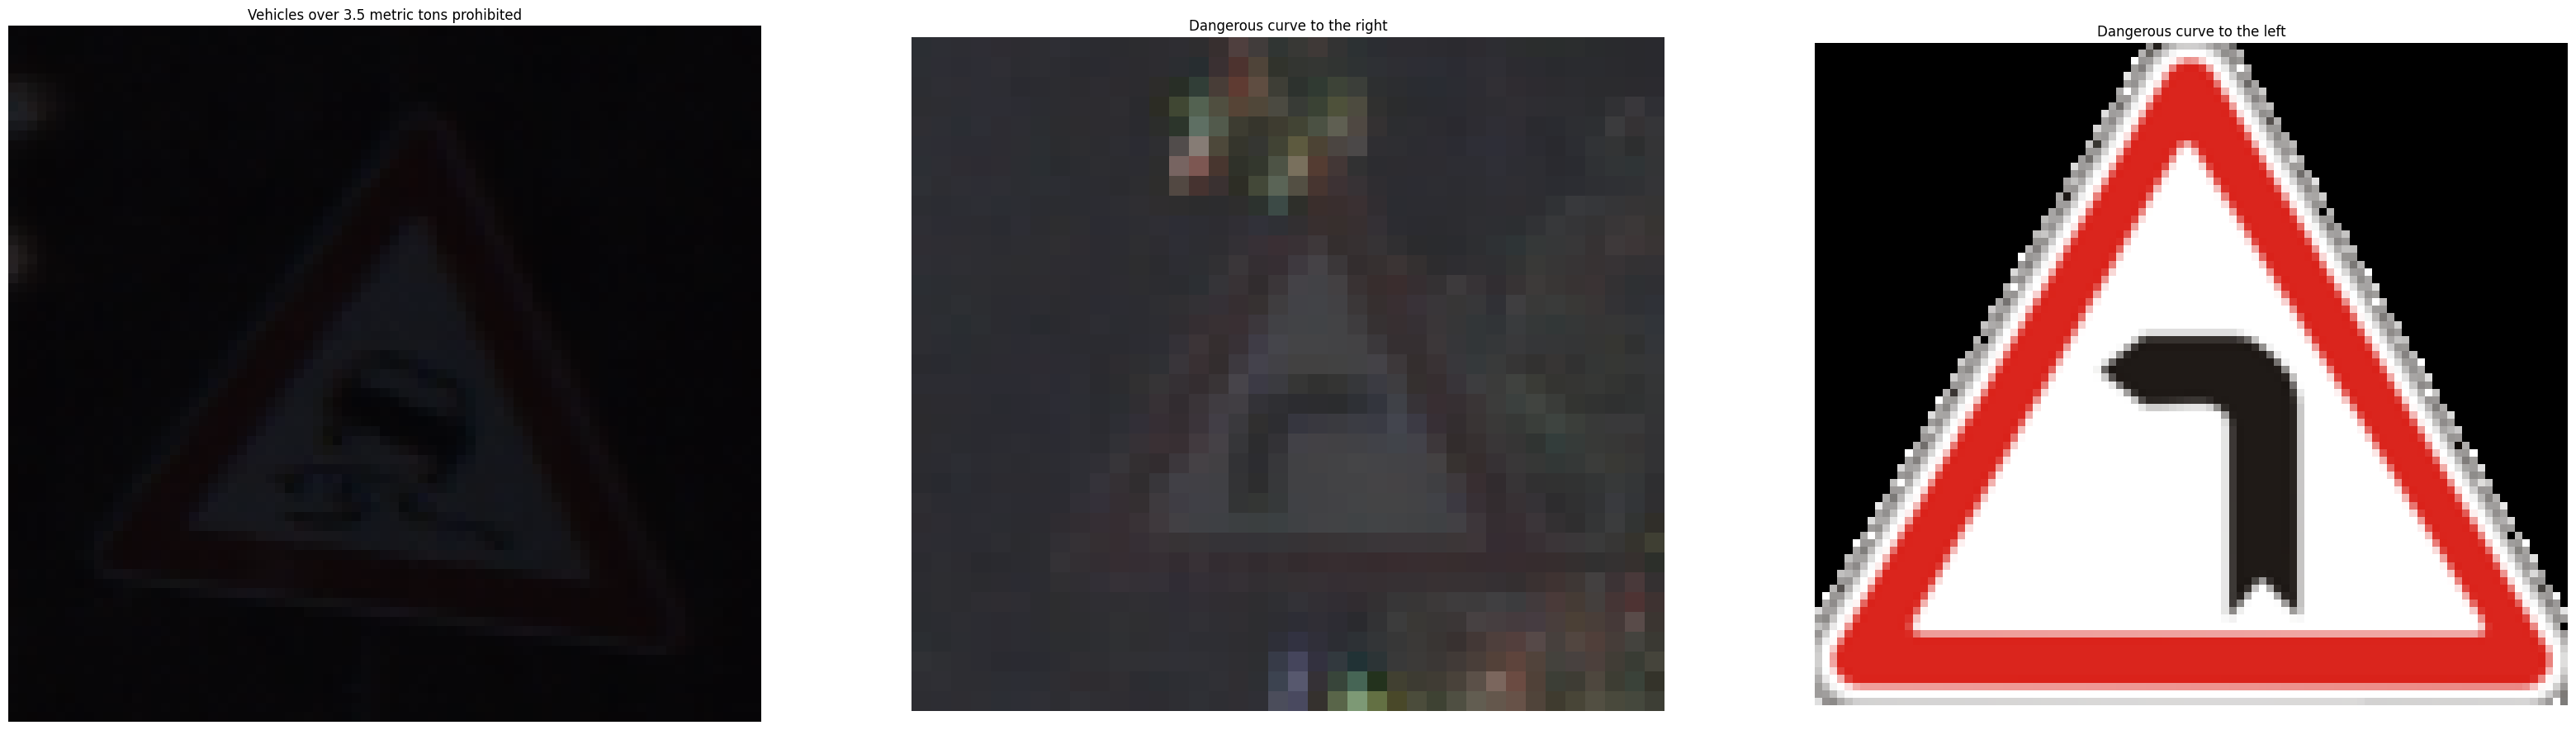

In [42]:
random_number = random.randint(0, 20)
print(random_number)
plt.figure(figsize=(40,40))
plt.subplot(131)
plt.axis("off")
img=cv2.imread(test_images[random_number])
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(test_merged["SignName"][random_number])
plt.subplot(132)
img2=cv2.imread(train_images[random_number])
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.title(train_merged["SignName"][random_number])
plt.axis("off")
plt.subplot(133)
img3=cv2.imread(meta_images[random_number])
img3=cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.title(meta_merged["SignName"][random_number])
plt.axis("off")
plt.show()

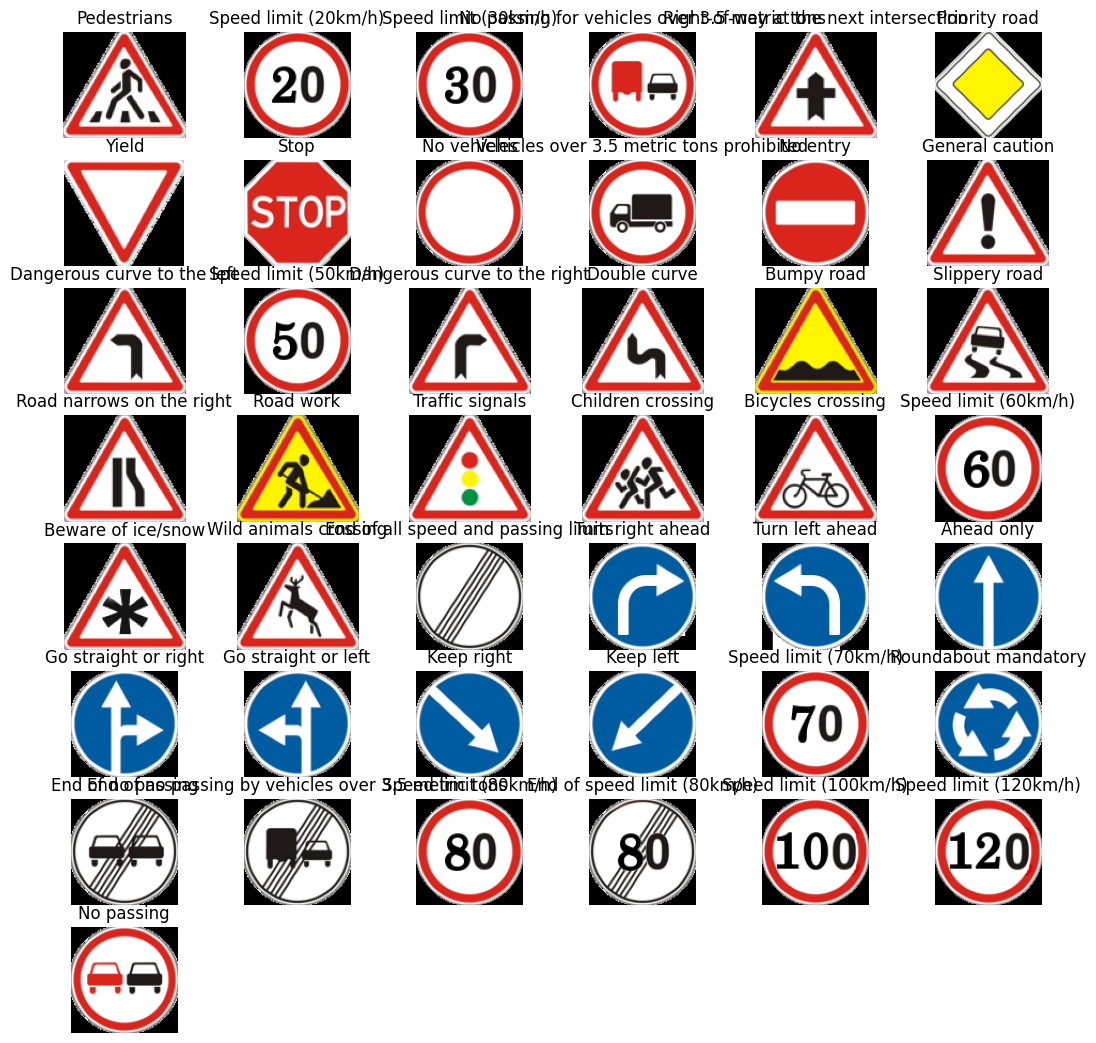

In [35]:
num_cols=6
num_rows=num_classes//num_cols+1
plt.figure(figsize=(13,13))
for i in range(num_classes):
    plt.subplot(num_rows,num_cols,i+1)
    img=cv2.imread(meta_images[i])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(meta_merged["SignName"][i])
    plt.imshow(img)

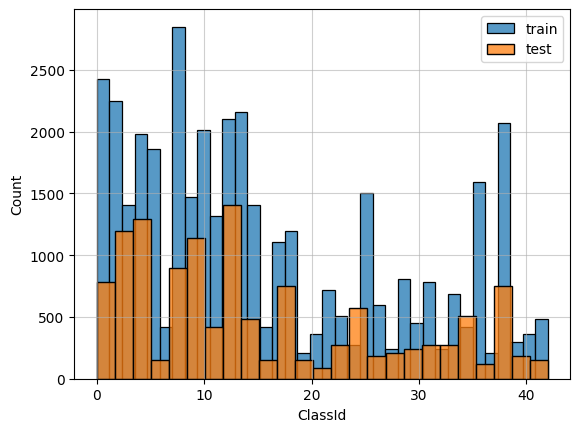

In [44]:
sn.histplot(train_merged["ClassId"],label="train")
sn.histplot(test_merged["ClassId"],label="test")
plt.grid(alpha=.6)
plt.legend()

<Axes: title={'center': 'Broj pojavljivanja znaka u trening skupu'}, xlabel='SignName'>

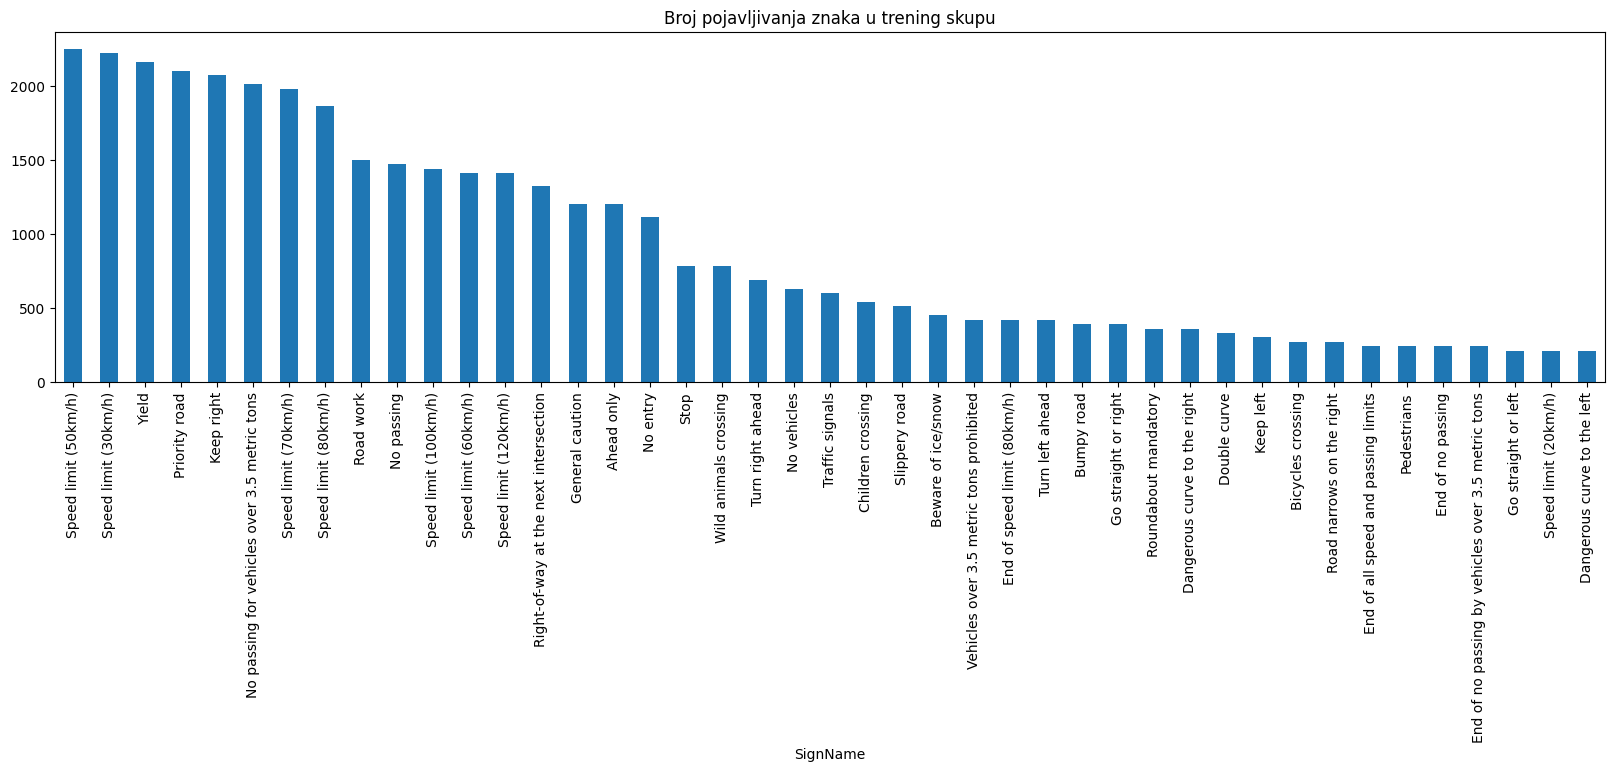

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(211)
train_merged["SignName"].value_counts().plot(kind="bar",title="Broj pojavljivanja znaka u trening skupu")

<Axes: title={'center': 'Broj pojavljivanja znaka u test skupu'}, xlabel='SignName'>

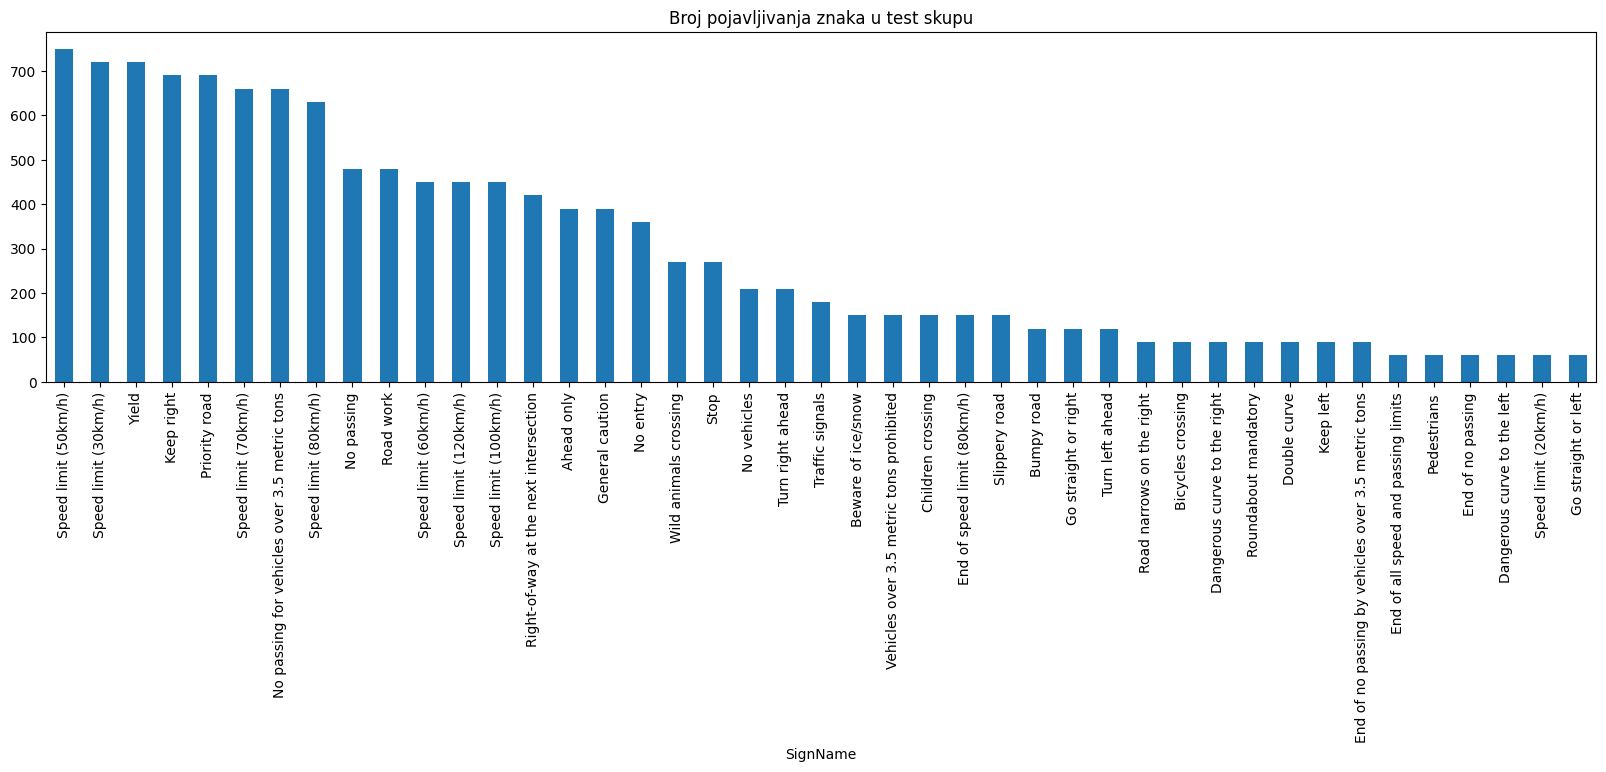

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(212)
test_merged["SignName"].value_counts().plot(kind="bar",title="Broj pojavljivanja znaka u test skupu")

In [59]:
data_path = './podaci_klasifikacija'
train_data_path = os.path.join(data_path, 'Train')

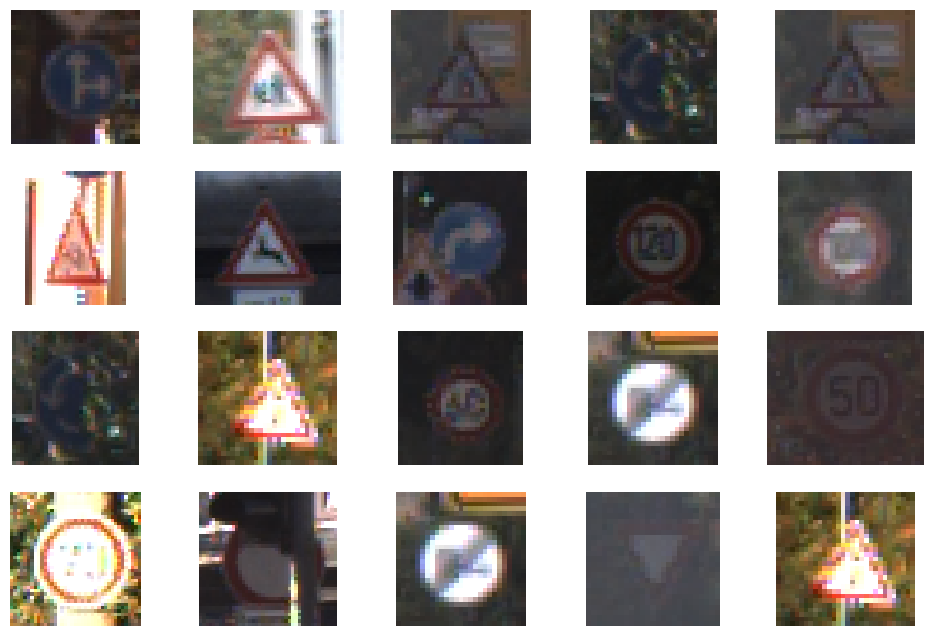

In [60]:
from PIL import Image 

folder_names = [os.path.join(train_data_path, str(i)) for i in random.choices(range(num_classes), k=20)]
file_names = [os.path.join(fldr, os.listdir(fldr)[0]) for fldr in folder_names]

fig, axes = plt.subplots(4, 5, figsize=(12, 8))
for i, image_path in enumerate(file_names):
    image = Image.open(image_path)
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.show()

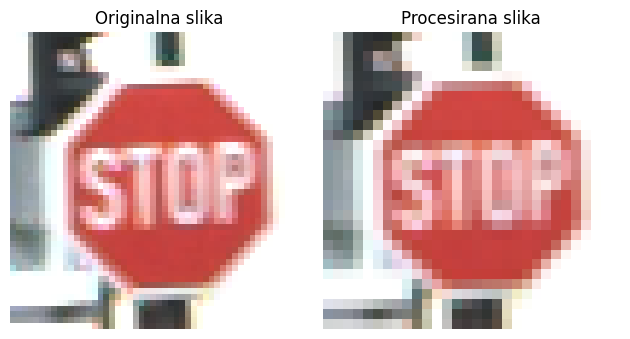

In [66]:
sample_image_path = './podaci_klasifikacija/Train/14/00014_00001_00013.png'

sample_image = Image.open(sample_image_path)
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Originalna slika')
plt.axis('off')

preprocessed_image = sample_image.resize((30, 30))
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image)
plt.title('Procesirana slika')
plt.axis('off')

plt.tight_layout()
plt.show()

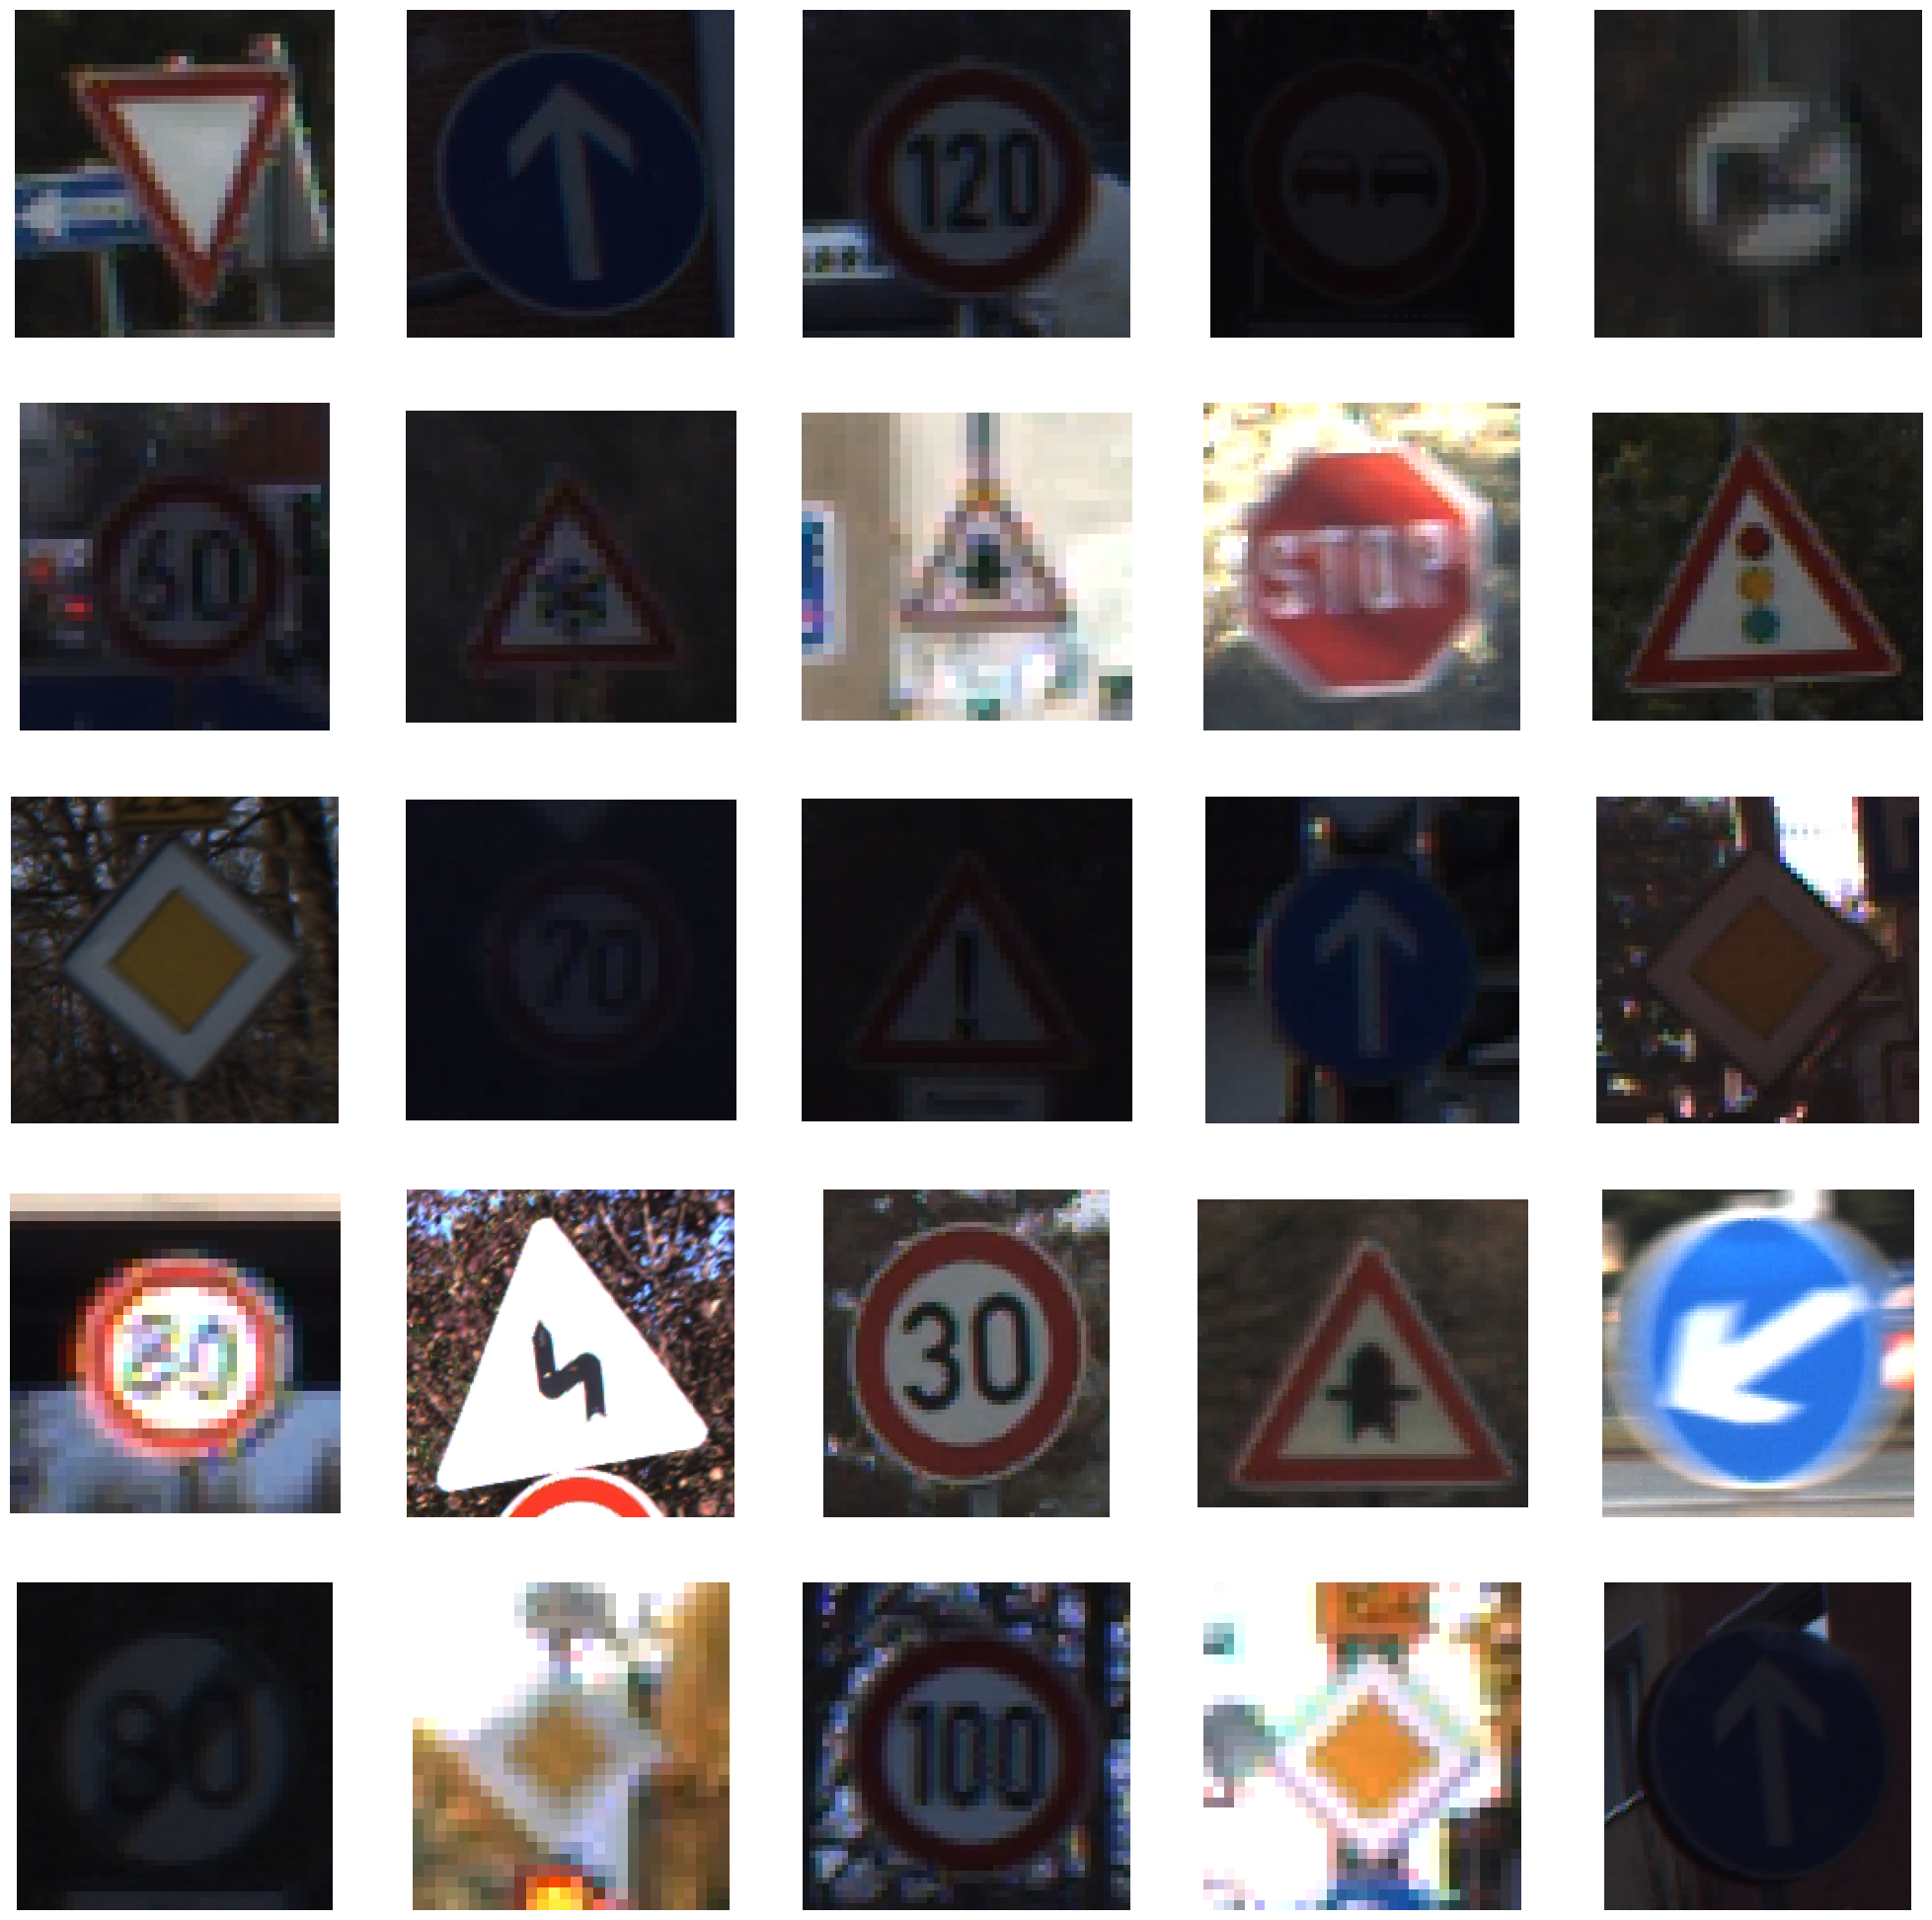

In [71]:
import random
from matplotlib.image import imread
data_dir = './podaci_klasifikacija'
imgs = test_df['Path'].values
plt.figure(figsize=(25, 25))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_image_path = data_dir + '/' + random.choice(imgs)
    random_image = imread(random_image_path)
    plt.imshow(random_image)
    plt.axis('off')
    plt.xlabel(random_image.shape[0], fontsize=20)
    plt.ylabel(random_image.shape[0], fontsize=20)